# Phase 2
## Step 1: Data Imports and Data Cleaning

In [8]:
# importing packages
import numpy as np
import pandas as pd

# data found: https://www.consumerfinance.gov/data-research/hmda/historic-data/ (year 2017)
# corresponding code information: https://files.consumerfinance.gov/hmda-historic-data-dictionaries/lar_record_codes.pdf

# reading file
df = pd.read_csv('data.csv', dtype = {'applicant_race_name_3': 'string', 
'applicant_race_name_4': 'string', 
'applicant_race_name_5': 'string', 
'co_applicant_race_name_3': 'string', 
'co_applicant_race_name_4': 'string', 
'co_applicant_race_name_5': 'string'})

MemoryError: Unable to allocate 109. MiB for an array with shape (14285496,) and data type object

In [7]:
df.head()

NameError: name 'df' is not defined

In [ ]:
# drop unnecessary columns based on scan of columns and documentation from website
df = df.drop(df.keys()[df.keys().str[-4:] == 'name'], axis = 1)

In [ ]:
# calculating percent missing to see what columns to drop for insufficient info (greater than 30%)
percent_missing = (df.isnull().sum() * 100 / len(df))
percent_missing = percent_missing.sort_values(ascending = False)
percent_missing[percent_missing > 30]

application_date_indicator    100.000000
sequence_number               100.000000
edit_status                   100.000000
co_applicant_race_5            99.997557
co_applicant_race_4            99.995352
applicant_race_5               99.992412
applicant_race_4               99.988492
co_applicant_race_3            99.984992
applicant_race_3               99.951069
co_applicant_race_2            99.787099
denial_reason_3                99.654629
applicant_race_2               99.367316
denial_reason_2                97.863903
rate_spread                    96.547036
denial_reason_1                90.116059
dtype: float64

In [ ]:
# dropping these columns
df = df.drop(percent_missing[percent_missing > 30].index, axis = 1)

In [ ]:
# dropping rows that have na values
df = df.dropna()

In [ ]:
# because all years are 2017, drop first column
df = df.drop('as_of_year', axis = 1)

In [ ]:
# because we are filtering comparing men to women, we drop all columns where sex != 1 or 2
df = df[(df['applicant_sex'] == 1) | (df['applicant_sex'] == 2)]

In [ ]:
# save cleaned dataset
df.to_csv('cleaned_data.csv')

In [ ]:
df.head()

,respondent_id,agency_code,loan_type,property_type,loan_purpose,owner_occupancy,loan_amount_000s,preapproval,action_taken,msamd,...,applicant_income_000s,purchaser_type,hoepa_status,lien_status,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units
0,0000342634,9,1,1,3,1,9.0,3,3,33860.0,...,54.0,0,2,2,1948.0,12.58,59700.0,122.93,507.0,724.0
2,22-3039688,7,3,1,3,1,161.0,3,5,33860.0,...,64.0,0,2,1,1948.0,12.58,59700.0,122.93,507.0,724.0
3,20-3878295,5,1,1,2,1,90.0,3,1,33860.0,...,61.0,1,2,1,1948.0,12.58,59700.0,122.93,507.0,724.0
4,0000342634,9,1,1,3,2,41.0,3,1,33860.0,...,133.0,0,2,1,1948.0,12.58,59700.0,122.93,507.0,724.0
6,0000013303,3,2,1,1,1,76.0,3,1,33860.0,...,87.0,6,2,1,1948.0,12.58,59700.0,122.93,507.0,724.0


## Step 2: Summary Statistics

In [ ]:
import numpy as np
import pandas as pd

df_cleaned = pd.read_csv("cleaned_data.csv")

In [ ]:
# number of overall rows in the cleaned dataset

print("Number of overall rows in the cleaned dataset:")
df_cleaned.shape[0]

Number of overall rows in the cleaned dataset:


9793702

In [ ]:
# number of overall cols in the cleaned dataset

print("Number of overall columns in the cleaned dataset:")
df_cleaned.shape[1]

Number of overall columns in the cleaned dataset:


30

In [ ]:
# sensitive attribute 1: Race

# Race: Non-black
df_cleaned_non_black = df_cleaned.loc[df_cleaned['applicant_race_1'] != 3]

print("Number of overall rows of Non-black people in the cleaned dataset:")
print(df_cleaned_non_black.shape[0])
print("Number of overall columns of Non-black people in the cleaned dataset:")
print(df_cleaned_non_black.shape[1])

# Race: Black
df_cleaned_black = df_cleaned.loc[df_cleaned['applicant_race_1'] == 3]

print("Number of overall rows of Black or African American people in the cleaned dataset:")
print(df_cleaned_black.shape[0])
print("Number of overall columns of Black or African American people in the cleaned dataset:")
print(df_cleaned_black.shape[1])

Number of overall rows of Non-black people in the cleaned dataset:
8971510
Number of overall columns of Non-black people in the cleaned dataset:
30
Number of overall rows of Black or African American people in the cleaned dataset:
822192
Number of overall columns of Black or African American people in the cleaned dataset:
30


In [ ]:
# sensitive attribute 2: Gender

# Gender: Male
df_cleaned_male= df_cleaned.loc[df_cleaned['applicant_sex'] == 1]

print("Number of overall rows of Male in the cleaned dataset:")
print(df_cleaned_male.shape[0])
print("Number of overall columns of Male in the cleaned dataset:")
print(df_cleaned_male.shape[1])

# Gender: Female
df_cleaned_female = df_cleaned.loc[df_cleaned['applicant_sex'] == 2]

print("Number of overall rows of Female in the cleaned dataset:")
print(df_cleaned_female.shape[0])
print("Number of overall columns of Female in the cleaned dataset:")
print(df_cleaned_female.shape[1])

Number of overall rows of Male in the cleaned dataset:
6644522
Number of overall columns of Male in the cleaned dataset:
30
Number of overall rows of Female in the cleaned dataset:
3149180
Number of overall columns of Female in the cleaned dataset:
30


In [ ]:
# Outcome variables of Main Interests
print('The mean / median / standard deviation values of variables of interests of overall group:')
df_cleaned[['action_taken']].describe()

The mean / median / standard deviation values of variables of interests of overall group:


,action_taken
count,9.793702e+06
mean,2.205999e+00
std,1.623058e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,8.000000e+00


In [ ]:
# sensitive attribute 1: Race - Non-black

print('The mean / median / standard deviation values of variables of interests of Non-black people:')
df_cleaned_non_black[['action_taken']].describe()

The mean / median / standard deviation values of variables of interests of Non-black people:


,action_taken
count,8.971510e+06
mean,2.189708e+00
std,1.631109e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,8.000000e+00


In [ ]:
# sensitive attribute 1: Race - Black

print('The mean / median / standard deviation values of variables of interests of Black people:')
df_cleaned_black[['action_taken']].describe()

The mean / median / standard deviation values of variables of interests of Black people:


,action_taken
count,822192.000000
mean,2.383766
std,1.521168
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,8.000000


In [ ]:
# sensitive attribute 2: Gender - Male

print('The mean / median / standard deviation values of variables of interests of Male:')
df_cleaned_male[['action_taken']].describe()

The mean / median / standard deviation values of variables of interests of Male:


,action_taken
count,6.644522e+06
mean,2.199313e+00
std,1.631647e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,8.000000e+00


In [ ]:
# sensitive attribute 2: Gender - Female

print('The mean / median / standard deviation values of variables of interests of Female:')
df_cleaned_female[['action_taken']].describe()

The mean / median / standard deviation values of variables of interests of Female:


,action_taken
count,3.149180e+06
mean,2.220105e+00
std,1.604695e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,8.000000e+00


In [ ]:
# Other outcome variables of Interests
print('The mean / median / standard deviation values of variables of interests of overall group:')
df_cleaned[['preapproval', 'loan_purpose', 'loan_type', 'hoepa_status', 'loan_amount_000s']].describe()

The mean / median / standard deviation values of variables of interests of overall group:


,preapproval,loan_purpose,loan_type,hoepa_status,loan_amount_000s
count,9.793702e+06,9.793702e+06,9.793702e+06,9.793702e+06,9.793702e+06
mean,2.779028e+00,1.839091e+00,1.362479e+00,1.999747e+00,2.420835e+02
std,4.764173e-01,9.437731e-01,6.841698e-01,1.590779e-02,5.762923e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.200000e+02
50%,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.960000e+02
75%,3.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,3.030000e+02
max,3.000000e+00,3.000000e+00,4.000000e+00,2.000000e+00,4.040000e+05


In [ ]:
# sensitive attribute 1: Race - Non-black

print('The mean / median / standard deviation values of variables of interests of Non-black people:')
df_cleaned_non_black[['preapproval', 'loan_purpose', 'loan_type', 'hoepa_status', 'loan_amount_000s']].describe()

The mean / median / standard deviation values of variables of interests of Non-black people:


,preapproval,loan_purpose,loan_type,hoepa_status,loan_amount_000s
count,8.971510e+06,8.971510e+06,8.971510e+06,8.971510e+06,8.971510e+06
mean,2.780272e+00,1.837060e+00,1.340209e+00,1.999754e+00,2.462406e+02
std,4.754478e-01,9.446531e-01,6.718462e-01,1.569669e-02,4.613608e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.220000e+02
50%,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+02
75%,3.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,3.080000e+02
max,3.000000e+00,3.000000e+00,4.000000e+00,2.000000e+00,4.040000e+05


In [ ]:
# sensitive attribute 1: Race - Black

print('The mean / median / standard deviation values of variables of interests of Black people:')
df_cleaned_black[['preapproval', 'loan_purpose', 'loan_type', 'hoepa_status', 'loan_amount_000s']].describe()

The mean / median / standard deviation values of variables of interests of Black people:


,preapproval,loan_purpose,loan_type,hoepa_status,loan_amount_000s
count,822192.000000,822192.000000,822192.000000,822192.000000,822192.000000
mean,2.765454,1.861259,1.605480,1.999674,196.722055
std,0.486665,0.933831,0.765489,0.018051,1277.179172
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,1.000000,1.000000,2.000000,93.000000
50%,3.000000,1.000000,1.000000,2.000000,164.000000
75%,3.000000,3.000000,2.000000,2.000000,255.000000
max,3.000000,3.000000,4.000000,2.000000,398000.000000


In [ ]:
# sensitive attribute 2: Gender - Male

print('The mean / median / standard deviation values of variables of interests of Male:')
df_cleaned_male[['preapproval', 'loan_purpose', 'loan_type', 'hoepa_status', 'loan_amount_000s']].describe()

The mean / median / standard deviation values of variables of interests of Male:


,preapproval,loan_purpose,loan_type,hoepa_status,loan_amount_000s
count,6.644522e+06,6.644522e+06,6.644522e+06,6.644522e+06,6.644522e+06
mean,2.779527e+00,1.839506e+00,1.393524e+00,1.999761e+00,2.582581e+02
std,4.760381e-01,9.467813e-01,7.224162e-01,1.545758e-02,4.950104e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.290000e+02
50%,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.080000e+02
75%,3.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,3.220000e+02
max,3.000000e+00,3.000000e+00,4.000000e+00,2.000000e+00,3.980000e+05


In [ ]:
# sensitive attribute 2: Gender - Female

print('The mean / median / standard deviation values of variables of interests of Female:')
df_cleaned_female[['preapproval', 'loan_purpose', 'loan_type', 'hoepa_status', 'loan_amount_000s']].describe()

The mean / median / standard deviation values of variables of interests of Female:


,preapproval,loan_purpose,loan_type,hoepa_status,loan_amount_000s
count,3.149180e+06,3.149180e+06,3.149180e+06,3.149180e+06,3.149180e+06
mean,2.777975e+00,1.838217e+00,1.296977e+00,1.999717e+00,2.079562e+02
std,4.772148e-01,9.373939e-01,5.901333e-01,1.681817e-02,7.170236e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.030000e+02
50%,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.710000e+02
75%,3.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,2.660000e+02
max,3.000000e+00,3.000000e+00,4.000000e+00,2.000000e+00,4.040000e+05


In [ ]:
import matplotlib.pyplot as plt

race_data, action_taken_data, preapproval_data, loan_purpose_data, loan_type_data, hoepa_status_data, loan_amount_000s_data, co_race_data = df_cleaned['applicant_race_1'], df_cleaned['action_taken'], df_cleaned['preapproval'], df_cleaned['loan_purpose'], df_cleaned['loan_type'], df_cleaned['hoepa_status'], df_cleaned['loan_amount_000s'], df_cleaned['co_applicant_race_1'], 

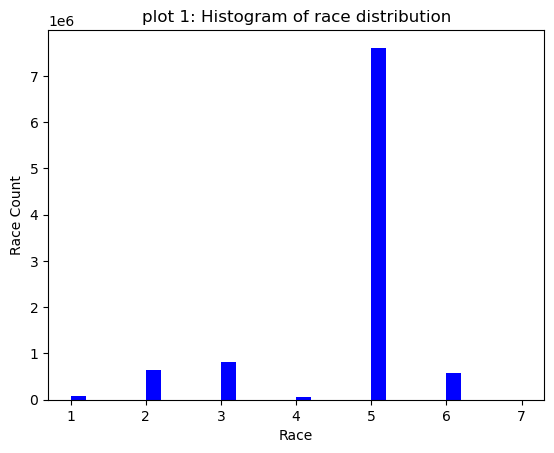

In [ ]:
# plot 1: Histogram of race distribution
plt.title('plot 1: Histogram of race distribution')
plt.xlabel('Race')
plt.ylabel('Race Count')
plt.hist(race_data, color='blue', bins = 30)
plt.show()

According to plot 1, there is a significantly large number of white people (5) applying mortgage in the dataset than all other races. The amount of native American (1: American Indian or Alaska Native, 4: Native Hawaiian or Other Pacific Islander) in the dataset is very small.

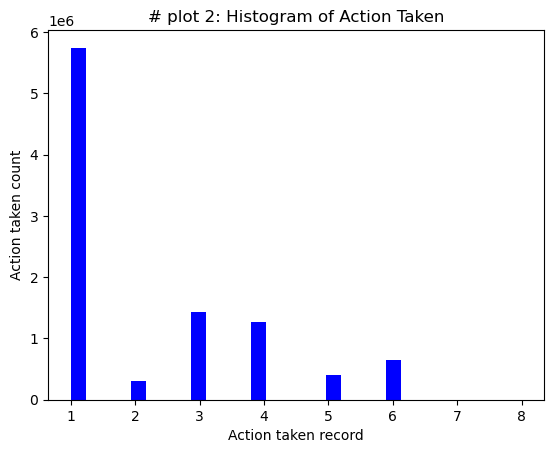

In [ ]:
# plot 2: Histogram of action_taken
plt.title('# plot 2: Histogram of Action Taken')
plt.xlabel('Action taken record')
plt.ylabel('Action taken count')
plt.hist(action_taken_data, color='blue', bins = 30)
plt.show()

According to plot 2, there is a significantly large number of people with Loan originated (1). The second and third largest group sets are Application denied by financial institution (3) and Application withdrawn by applicant (4). Excluding those with preapproval request denied by financial institution (7) and Preapproval request approved but not accepted (8), Application approved but not accepted (2) is the smallest group sets.

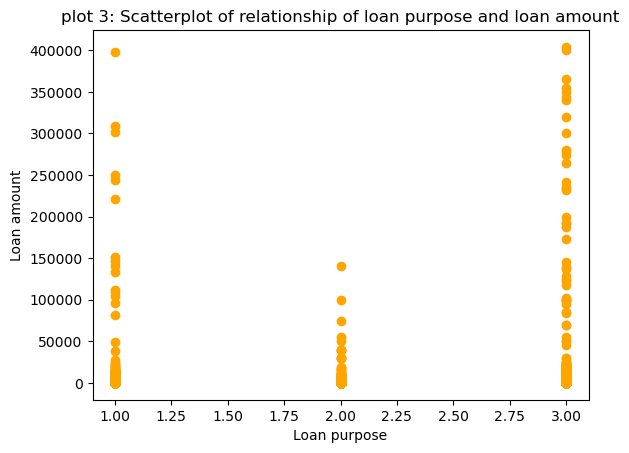

In [ ]:
# plot 3: Scatterplot of relationship of loan purpose and loan amount
plt.title('plot 3: Scatterplot of relationship of loan purpose and loan amount')
plt.xlabel('Loan purpose')
plt.ylabel('Loan amount')
plt.scatter(loan_purpose_data, loan_amount_000s_data, color='orange')
plt.show()

According to plot 3, the people with loan purpose "Home improvement" (2) usually has a lower loan amount. It makes sense in real life, because it cost much less to repair home than buying a home or refinancing. The loan amount varies the most for the purpose of "Refinancing" (3), with many higher amounts of loans than the other purposes. For the purpose of "Home purchase" (1), there are many high and low loan amounts exisiting, which shows a great variety for the cost of purchasing a house.

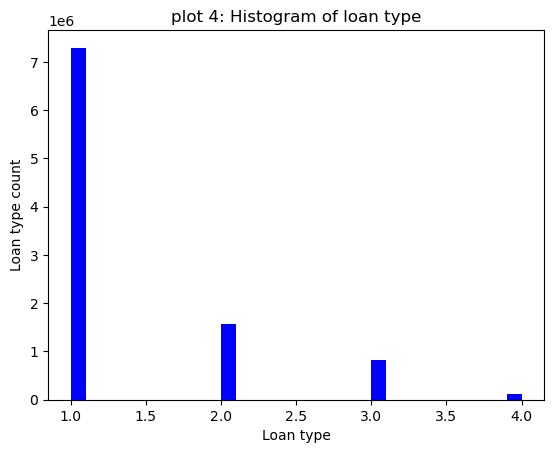

In [ ]:
# plot 4: Histogram of loan type
plt.title('plot 4: Histogram of loan type')
plt.xlabel('Loan type')
plt.ylabel('Loan type count')
plt.hist(loan_type_data, color='blue', bins = 30)
plt.show()

According to plot 4, the largest type is Conventional (any loan other than FHA, VA, FSA, or RHS loans) (1). The second largest loan type is FHA-insured (Federal Housing Administration) (2). The third largest loan type is VA-guaranteed (Veterans Administration) (3). The smallest loan type is FSA/RHS (Farm Service Agency or Rural Housing Service) (4).

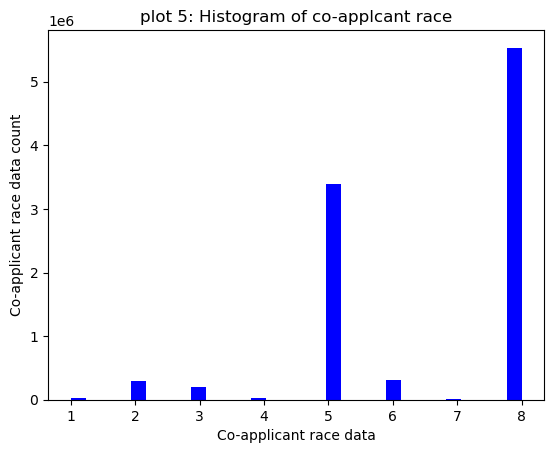

In [ ]:
# plot 5: Histogram of co-applcant risk
plt.title('plot 5: Histogram of co-applcant race')
plt.xlabel('Co-applicant race data')
plt.ylabel('Co-applicant race data count')
plt.hist(co_race_data, color='blue', bins = 30)
plt.show()

According to plot 5, most people have no co-applicant (8). For those with a co-applicant, white (5) people is at the largest amount, and the native Americans are at the lowest amount (1, 4), which is similar to the histogram of applicant race.

## Step 3: Research Question, Hypotheses, and Analysis Plan
### Research Question
Inputs: `Purchaser Type` (C), `Agency Code` (C), `Loan Type` (C), `Loan Amount` (N), `Applicant Income` (N)
Outputs: `Action Taken ` (C)
Evaluation Metrics: Recall
\* (C) represents Categorical and (N) represents Numerical

The inputs we are interested in are `Purchaser Type`, `Loan Type`, `Property Type`, `Loan Purpose`, `Loan Amount`, and `Applicant Income` because they are, intuitively, the most applicable to whether a loan gets accepted or not. According to [investopedia](https://www.investopedia.com/articles/mortgages-real-estate/08/mortgage-candidate.asp), credit score, debt, income, and appraisal value have an impact on whether an applicant has successfully gets a mortgage, so I believe that these variables can be the most indicative of these measures. We're being intentional in not performing analysis based off of `Applicant Sex`, `Applicant Race`, or `Applicant Ethnicity`, because these factors should not affect whether an applicant gets approved or not (sensitive features).

The main output we want to check is `Action Taken`, because this column indicates whether the loan was approved or not (aka originated). Another potential column of interest is `Denial Reason 1`, `Denial Reason 2`, or `Denial Reason 3` because it could be good supplemental information as to what was faulty about the application.

Our main evaluation metric is recall because we believe that telling an applicant that they can't get a loan when they actually can is more detrimental than saying they can when they can't. Although there is the time aspect that goes into applying for a loan, it's better to apply and get rejected than not apply at all, because there is still a chance that the applicant could have gotten funding. However, although we are focusing on recall, we will still check other metrics like precision/F1 to make sure there isn't too much of a skew in the data. When applicable, we will state the p-values of our tests, which will indicate if our results are statistically significant.

We will also evaluate across the sensitive features for fairness, focusing on predictive equality, but also taking into consideration statistical parity and calibration. We consider predictive equality to be the main focus because we want to ensure that our model isn't unfairly predicting one race/gender/ethnicity would fail to get a loan compared to others.

Overall, the goal of this project is to create a loan approval prediction model that balances fairness and "accuracy" in the form of recall.

### Hypothesis
We predict that white people with a conventional loan will be the most likely to get approved in our model. This is due to the skew in our data towards a large amount of white people and conventional loans. This skew may be due to the makeup of the United States, which is majority white. Conventional loans also appear to be the most general and therefore most common type of loan we would see. By ensuring that our data is even across the different sensitive features, we predict that the model, in turn, will become more fair and representative for each sex, race, and ethnicity.

### Analysis
Since we have five people in our group, we will run five analysis:

#### Analysis 1: Logistic Regression Model (Numerical Variables to Categorical)
We will first run a logistic regression model using `Loan Amount` and `Applicant Income` to try to predict `Action Taken`. This is a initial test to see how well a model will run without any modifications to the data

#### Analysis 2: KNN Model (Numerical Variables to Categorical)
We will then run a KNN model using `Loan Amount` and `Applicant Income` to try to predict `Action Taken`. This is a initial test to see how well a model will run without any modifications to the data, to be compared to the results of analysis 1

#### Analysis 3: Random Forest Model (Categorical Variables to Categorical)
We will first run a random forest model using `Purchaser Type`, `Agency Code`, and `Loan Type` to try to predict `Action Taken`. This is an initial test to see how well a model will run without any modifications to the data, using the categorical variables provided.

#### Analysis 4: Upsampled Logistic Regression Model or KNN (Numerical Variables to Categorical)
Based on the model that performed better (in terms of accuracy) between KNN and Logistic, we will upsample the data (by downsampling the overrepresented groups (white people, etc.)) in order to try to create a more fair model (evaluated using predictive equality).

#### Analysis 5: Upsampled Random Forest Model (Categorical Variables to Categorical)
We will upsample then use the upsampled data for the random forest model in order to try to create a more fair model (evaluated using predictive equality).

